# NSLS 11-BM Calibration

### Import python libraries

In [1]:
# numpy and plotting
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Data handling
import glob
import os
import pandas as pd

# pyFAI
import pyFAI
from pyFAI.calibrant import get_calibrant

# pygix
import pygix
import fabio
from pygix import plotting as ppl

# Peak Fitting, optimization
from lmfit.models import GaussianModel, LorentzianModel, ExponentialModel, ConstantModel, LinearModel, VoigtModel
from scipy.optimize import minimize
from scipy.signal import medfilt

# Fix MPL params
rcParams.update({'figure.autolayout': True,
                 'xtick.top': True,
                 'xtick.direction': 'in',
                 'ytick.right': True,
                 'ytick.direction': 'in',
                 'font.sans-serif': 'Arial',
                 'font.size': 14
                })
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.dpi'] = 96

C:\Users\nep1\anaconda3\envs\xray\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Load data & metadata files

In [2]:
base_folder = "\\\\cfs2e.nist.gov\\63_mml\\642\\users\\saxs8542\\Data\\ALS 7.3.3\\2018_May\\WAXS"
edf_glob = glob.glob(os.path.join(base_folder,'*.edf'))
print(edf_glob[0])

\\cfs2e.nist.gov\63_mml\642\users\saxs8542\Data\ALS 7.3.3\2018_May\WAXS\AgB_2m.edf


In [3]:
pd.read_table(txt_glob[0], sep=":", engine='c', header=None, index_col=0, skiprows=3, nrows=95).T

NameError: name 'txt_glob' is not defined

In [30]:
df = pd.DataFrame()
df['edf'] = edf_glob
df['txt'] = df['edf'].str.replace('edf','txt')
df

,edf,txt
0,\\cfs2e.nist.gov\63_mml\642\users\saxs8542\Dat...,\\cfs2e.nist.gov\63_mml\642\users\saxs8542\Dat...
1,\\cfs2e.nist.gov\63_mml\642\users\saxs8542\Dat...,\\cfs2e.nist.gov\63_mml\642\users\saxs8542\Dat...
2,\\cfs2e.nist.gov\63_mml\642\users\saxs8542\Dat...,\\cfs2e.nist.gov\63_mml\642\users\saxs8542\Dat...
3,\\cfs2e.nist.gov\63_mml\642\users\saxs8542\Dat...,\\cfs2e.nist.gov\63_mml\642\users\saxs8542\Dat...
4,\\cfs2e.nist.gov\63_mml\642\users\saxs8542\Dat...,\\cfs2e.nist.gov\63_mml\642\users\saxs8542\Dat...
5,\\cfs2e.nist.gov\63_mml\642\users\saxs8542\Dat...,\\cfs2e.nist.gov\63_mml\642\users\saxs8542\Dat...
6,\\cfs2e.nist.gov\63_mml\642\users\saxs8542\Dat...,\\cfs2e.nist.gov\63_mml\642\users\saxs8542\Dat...
7,\\cfs2e.nist.gov\63_mml\642\users\saxs8542\Dat...,\\cfs2e.nist.gov\63_mml\642\users\saxs8542\Dat...
8,\\cfs2e.nist.gov\63_mml\642\users\saxs8542\Dat...,\\cfs2e.nist.gov\63_mml\642\users\saxs8542\Dat...
9,\\cfs2e.nist.gov\63_mml\642\users\saxs8542\Dat...,\\cfs2e.nist.gov\63_mml\642\users\saxs8542\Dat...


In [41]:
meta = df.apply(lambda r: pd.read_table(r['txt'], sep=":", engine='c',
                                              header=None, index_col=0,
                                              skiprows=3, nrows=95).T,
                               axis=1)
meta.loc[1].loc[1]

0
Motors                           53.000000
Sample X Stage                   35.287000
Sample Y Stage                   28.106038
Sample Y Stage Robot              0.000000
Sample X Stage fine             -49.380800
Sample Y Stage fine               5.733929
Sample Alpha Stage                0.160803
Sample Phi Stage                  0.116426
Sample Rotation Stage             0.000000
M201 Feedback                    -0.001739
M1 Pitch                          0.107148
M1 Bend                          50.344796
Detector Horizontal               0.000000
Detector Vertical                 0.000000
Slit1 top                         8.990500
Slit1 bottom                     11.972500
Slit1 right                      11.680000
Slit1 left                        9.814000
Exit Slit top                     5.981500
Exit Slit bottom                 12.861500
Exit Slit left                   11.137500
Exit Slit right                   4.463000
GIWAXS beamstop X                 0.000000
GIWAXS be

In [24]:
df = pd.concat(df,
               df['txt'].apply(lambda f: pd.read_table(f, sep=":", engine='c',
                                      header=None, index_col=0,
                                      skiprows=3, nrows=95).T)
              )

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [22]:
new

0     0 Motors Sample X Stage Sample Y Stage Sample ...
1     0  Motors  Sample X Stage  Sample Y Stage  Sam...
2     0 Motors Sample X Stage Sample Y Stage Sample ...
3     0 Motors Sample X Stage Sample Y Stage Sample ...
4     0 Motors Sample X Stage Sample Y Stage Sample ...
5     0 Motors Sample X Stage Sample Y Stage Sample ...
6     0 Motors Sample X Stage Sample Y Stage Sample ...
7     0 Motors Sample X Stage Sample Y Stage Sample ...
8     0 Motors Sample X Stage Sample Y Stage Sample ...
9     0 Motors Sample X Stage Sample Y Stage Sample ...
10    0 Motors Sample X Stage Sample Y Stage Sample ...
11    0  Motors  Sample X Stage  Sample Y Stage  Sam...
Name: txt, dtype: object

<IPython.core.display.Javascript object>


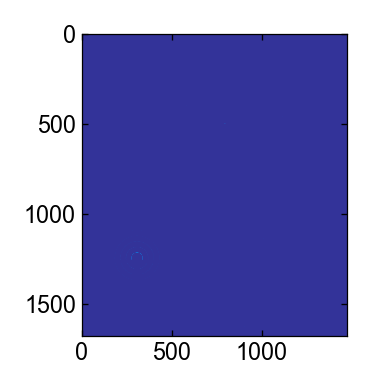

In [19]:
%matplotlib notebook
test_img = fabio.open(edf_glob[0]).data
plt.imshow(test_img, cmap='terrain')

## Master dataframe for background files

In [11]:
df = build_master_table(raw_files)
df

,tiff,sample,solvent,speed,grooves,shot,theta,phi,exp_time,stamp
0,/Users/nils/CC/N2200/data/nsls/AgBH_5m_cali_2_...,AgBH_5m_cali,AgBH,5m,cali,2,0.00,-0.000,5.0,325173
1,/Users/nils/CC/N2200/data/nsls/Tol_fast_ng_10_...,Tol_fast_ng,Tol,fast,ng,10,0.18,90.001,15.0,323612
2,/Users/nils/CC/N2200/data/nsls/Tol_fast_ng_11_...,Tol_fast_ng,Tol,fast,ng,11,0.14,0.000,15.0,323613
3,/Users/nils/CC/N2200/data/nsls/Tol_fast_ng_12_...,Tol_fast_ng,Tol,fast,ng,12,0.14,3.001,15.0,323614
4,/Users/nils/CC/N2200/data/nsls/Tol_fast_ng_13_...,Tol_fast_ng,Tol,fast,ng,13,0.14,6.001,15.0,323615
5,/Users/nils/CC/N2200/data/nsls/Tol_fast_ng_14_...,Tol_fast_ng,Tol,fast,ng,14,0.14,9.001,15.0,323616
6,/Users/nils/CC/N2200/data/nsls/Tol_fast_ng_15_...,Tol_fast_ng,Tol,fast,ng,15,0.14,12.001,15.0,323617
7,/Users/nils/CC/N2200/data/nsls/Tol_fast_ng_16_...,Tol_fast_ng,Tol,fast,ng,16,0.14,15.001,15.0,323618
8,/Users/nils/CC/N2200/data/nsls/Tol_fast_ng_17_...,Tol_fast_ng,Tol,fast,ng,17,0.14,18.001,15.0,323619
9,/Users/nils/CC/N2200/data/nsls/Tol_fast_ng_18_...,Tol_fast_ng,Tol,fast,ng,18,0.14,21.001,15.0,323620


## Calibration

<IPython.core.display.Javascript object>


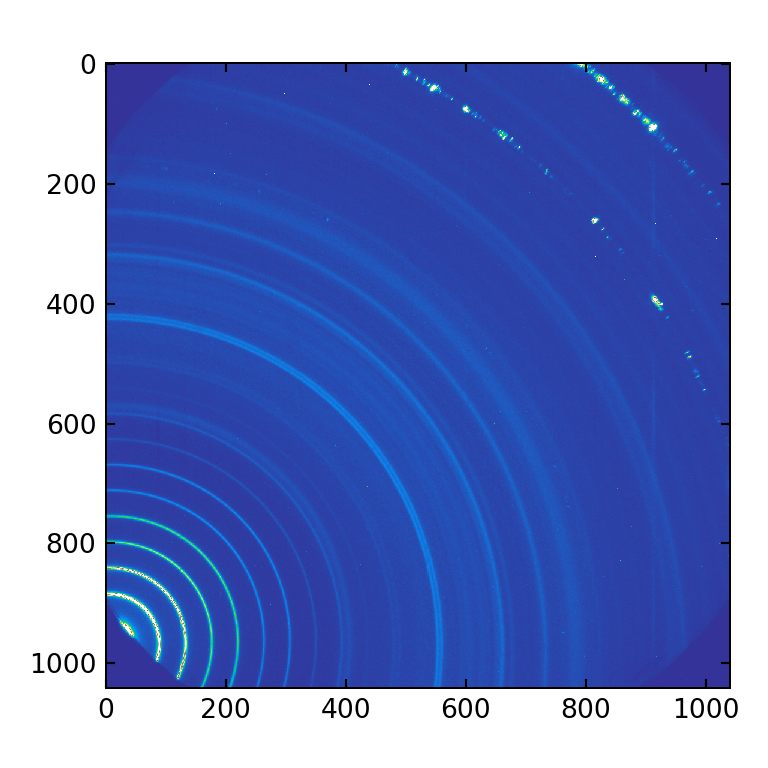

In [4]:
%matplotlib notebook

det_shape = (1042,1042)

calib_data = fabio.open(df.loc[0].tiff)
calib_array = np.array(calib_data.data).reshape(det_shape)

lmin, lmax = np.percentile(calib_array, (2, 99.9))
plt.figure(figsize=(4,4))
plt.imshow(calib_array, cmap='terrain',
           vmin=lmin, vmax=lmax,
           origin='upper')

### Beam center looks like [966,7]

In [5]:
# NSLS-II is a photon Science CCD
 
# 1042x1042 with 0.1017 mm pixels
# 11 keV
# nominally 228.8 mm
# has ~ 16 degree horizontal tilt
# has a ~ 995 count offset

### Starting beam position
sdd_guess = 0.2288
center_guess = [966,7] # -y, +x

### Detector pixel size
det_pix = [101.7e-6, 101.7e-6]
detector = pyFAI.detectors.Detector(det_pix[0], det_pix[1])

### Wavelength
wl = 1.127e-10

### Silver whatever calibrant
agbh = get_calibrant('AgBh')
agbh._wavelength = wl
vars(agbh)

{'_filename': '/anaconda/envs/pygix/lib/python3.6/site-packages/pyFAI/utils/../resources/calibration/AgBh.D',
 '_wavelength': 1.127e-10,
 '_sem': <threading.Semaphore at 0x1c18d418d0>,
 '_2th': [],
 '_dSpacing': []}

## Compare real calibration image to fake one

<IPython.core.display.Javascript object>


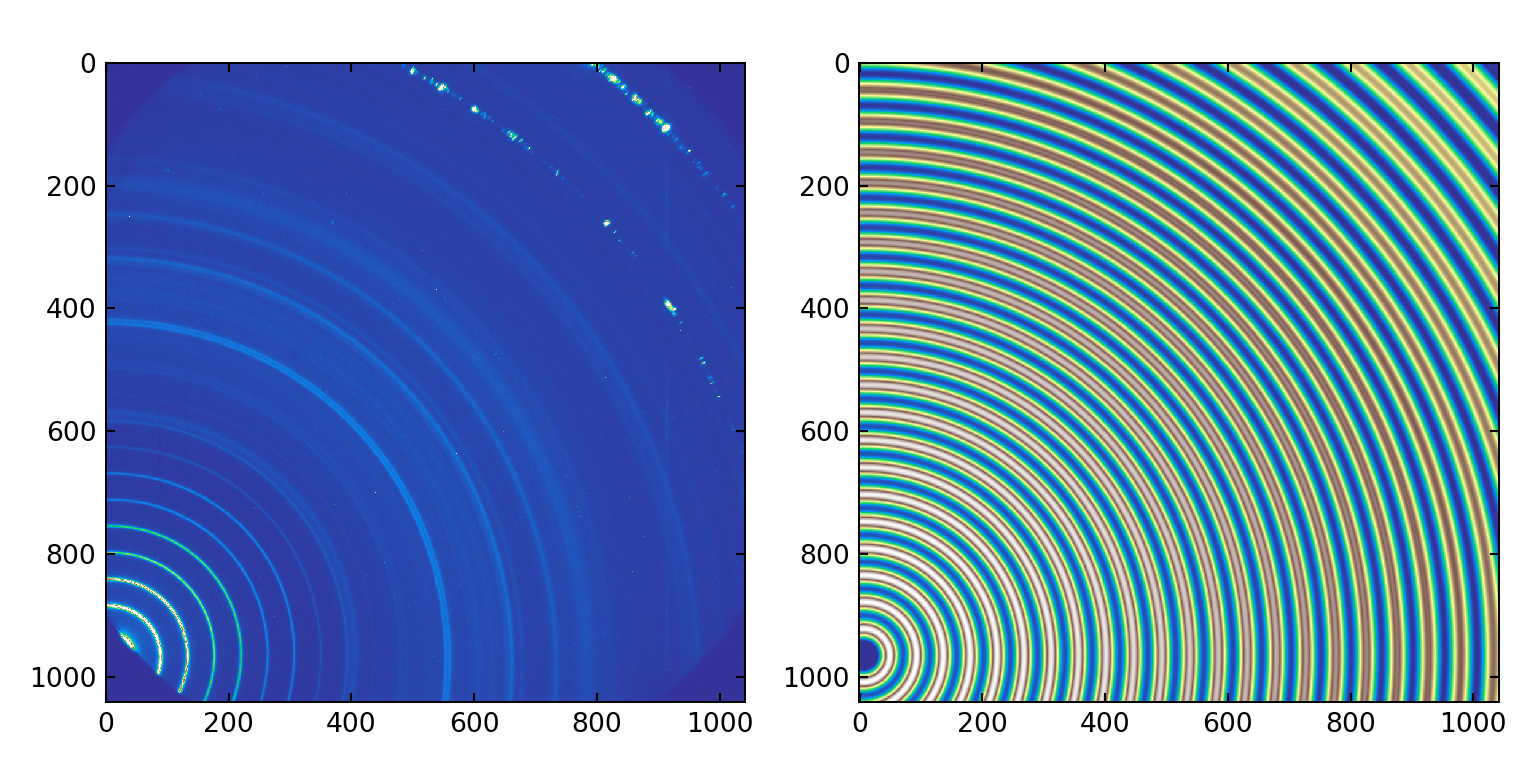

In [6]:
### Give initial guess of center location (in meters from the image origin i.e top left)
poni1_guess = center_guess[0]*det_pix[0]
poni2_guess = center_guess[1]*det_pix[1]

### Have to define an "azi integrator" then it can generate fake image of the calibrant
ai = pyFAI.AzimuthalIntegrator(dist=sdd_guess, poni1=poni1_guess, poni2=poni2_guess,
                               detector=detector, wavelength=wl)
fake = agbh.fake_calibration_image(ai, shape = det_shape)

### Plot the real calibration image next to fake one
cmin, cmax = np.percentile(fake, (2, 99.9))
plt.figure(figsize=(8,4))
plt.subplot(1,2,2)
plt.imshow(fake, cmap='terrain',
           vmin=cmin, vmax=cmax,
           origin='upper')
plt.subplot(1,2,1)
plt.imshow(calib_array, cmap='terrain',
           vmin=lmin, vmax=lmax,
           origin='upper')

## Define an optimizer that will fit a fake ring to a real ring
Looks like we should target the first ring, so we need to define mask bounds so we don't try to fit every ring

In [7]:
def calib_obj_fun(x, calib_img, detector, calibrant, bb, wl, det_shape):
    
    # x: [beam_cent_y, beam_cent_x, sdd, fake_scale]
    # bb is mask bounds [-i, +i, -j, +j]
    
    # Set up test detector
    poni1 = x[0]*detector.get_pixel1()
    poni2 = x[1]*detector.get_pixel2()
    ai = pyFAI.AzimuthalIntegrator(dist=x[2], poni1=poni1, poni2=poni2,
                                   detector=detector, wavelength=wl)
    
    # Generate fake calibrant image, apply scale and background
    fake = calibrant.fake_calibration_image(ai, shape = det_shape) * x[3] + x[4]
    
    # Return the sum of the difference
    out = np.abs(np.sum(np.sum((calib_img-fake)[bb[0]:bb[1],bb[2]:bb[3]])))
    print('Residual: {}'.format(out))
    return out


def calibrate_waxs(calib_img, detector, calibrant, cent_init, sdd_init, scale_init, wl, det_shape, mask_bounds):
    
    init_params = [cent_init[0], cent_init[1], sdd_init, scale_init[0], scale_init[1]]
    args = (calib_img, detector, calibrant, mask_bounds, wl, det_shape)
    
    final_params = minimize(calib_obj_fun, init_params,
                            args=args, method='Nelder-Mead', tol=1e-3,
                            options={'disp':True})
    
    return final_params

In [8]:
mask_bounds = [870, 920, 50, 100] # indices of a box around a ring sector: [i-, i+, j-, j+]
scale_init = [8300, 1200] # scale + background... just estimate from image plot above
det_params = calibrate_waxs(calib_array, detector, agbh, center_guess, sdd_guess, scale_init, wl, det_shape, mask_bounds)
det_params

Residual: 9319190.77979108
Residual: 9668595.42774949
Residual: 9327937.82963726
Residual: 9729652.364848468
Residual: 9859956.918780632
Residual: 9469190.77979108
Residual: 9216025.042458694
Residual: 9079634.462482601
Residual: 9668102.173083253
Residual: 9816865.688151693
Residual: 10153177.708752835
Residual: 8991283.365819363
Residual: 8986838.032413527
Residual: 9066283.365819363
Residual: 9547883.72397837
Residual: 9639985.438423326
Residual: 8580975.249135152
Residual: 9352712.969918586
Residual: 9008645.849561129
Residual: 9844239.726123797
Residual: 8846475.700893296
Residual: 8465317.78627991
Residual: 8477258.945987616
Residual: 9330897.009007636
Residual: 8653102.648120945
Residual: 8439453.280484041
Residual: 8547344.495131657
Residual: 8497931.124602705
Residual: 9352987.789184112
Residual: 8490977.64193971
Residual: 8233147.133957167
Residual: 8022702.692561132
Residual: 8078895.553402439
Residual: 8371984.08695038
Residual: 8161964.963429699
Residual: 7858429.968353416

Residual: 0.21666670037666336
Residual: 0.07014099834486842
Residual: 0.19914195622550324
Residual: 0.0691477379295975
Residual: 0.17323879286414012
Residual: 0.05641031177947298
Residual: 0.16750244674040005
Residual: 0.057347836904227734
Residual: 0.14523366751382127
Residual: 0.048066073446534574
Residual: 0.1011403277516365
Residual: 0.0361336205387488
Residual: 0.09340212307870388
Residual: 0.029255217872560024
Residual: 0.08524779637809843
Residual: 0.030548854498192668
Residual: 0.08416748751187697
Residual: 0.021969005523715168
Residual: 0.060942388721741736
Residual: 0.027072136756032705
Residual: 0.06099572411039844
Residual: 0.02080062439199537
Residual: 0.045977669302374125
Residual: 0.01560579816577956
Residual: 0.04637012421153486
Residual: 0.011319109529722482
Residual: 0.029663678025826812
Residual: 0.01452549360692501
Residual: 0.03249925572890788
Residual: 0.01217928878031671
Residual: 0.030201204412151128
Residual: 0.00892645277781412
Residual: 0.024459255975671113
R

 final_simplex: (array([[9.71575373e+02, 1.05340862e+01, 2.34227789e-01, 2.05264069e+02,
        1.69105286e+03],
       [9.71575373e+02, 1.05340862e+01, 2.34227789e-01, 2.05264068e+02,
        1.69105286e+03],
       [9.71575373e+02, 1.05340862e+01, 2.34227789e-01, 2.05264067e+02,
        1.69105286e+03],
       [9.71575373e+02, 1.05340862e+01, 2.34227789e-01, 2.05264070e+02,
        1.69105286e+03],
       [9.71575373e+02, 1.05340862e+01, 2.34227789e-01, 2.05264067e+02,
        1.69105286e+03],
       [9.71575373e+02, 1.05340862e+01, 2.34227789e-01, 2.05264070e+02,
        1.69105286e+03]]), array([0.00093025, 0.00094832, 0.00116318, 0.0012435 , 0.00165367,
       0.00175103]))
           fun: 0.0009302478283643723
       message: 'Optimization terminated successfully.'
          nfev: 355
           nit: 179
        status: 0
       success: True
             x: array([9.71575373e+02, 1.05340862e+01, 2.34227789e-01, 2.05264069e+02,
       1.69105286e+03])

## Finally, build a detector based on the fitted parameters

In [12]:
### poni1 is the y-coordinate (in meters) on the detector where the beam hits.
### poni2 is same for x. So we take the fitted beam center in pixels and multiply by the pixel size
poni1 = det_params.x[0] * det_pix[0]
poni2 = det_params.x[1] * det_pix[1]
sdd = det_params.x[2]

# Orientations and Angles
sample_orientation = 1    # 1 is horizontal, 2 is vertical
tilt_angle = 0            # tilt angle of sample in deg (misalignment in "chi")

### show the master table again

In [13]:
df.loc[df['sample']=='Tol_fast_ng'].loc[df['theta']==0.14].loc[df['phi']>80]

,tiff,sample,solvent,speed,grooves,shot,theta,phi,exp_time,stamp
30,/Users/nils/CC/N2200/data/nsls/Tol_fast_ng_38_...,Tol_fast_ng,Tol,fast,ng,38,0.14,81.004,15.0,323640
31,/Users/nils/CC/N2200/data/nsls/Tol_fast_ng_39_...,Tol_fast_ng,Tol,fast,ng,39,0.14,84.005,15.0,323641
33,/Users/nils/CC/N2200/data/nsls/Tol_fast_ng_40_...,Tol_fast_ng,Tol,fast,ng,40,0.14,87.005,15.0,323642
34,/Users/nils/CC/N2200/data/nsls/Tol_fast_ng_42_...,Tol_fast_ng,Tol,fast,ng,42,0.14,93.005,15.0,323644
35,/Users/nils/CC/N2200/data/nsls/Tol_fast_ng_44_...,Tol_fast_ng,Tol,fast,ng,44,0.14,99.005,15.0,323646
36,/Users/nils/CC/N2200/data/nsls/Tol_fast_ng_46_...,Tol_fast_ng,Tol,fast,ng,46,0.14,105.005,15.0,323648
37,/Users/nils/CC/N2200/data/nsls/Tol_fast_ng_47_...,Tol_fast_ng,Tol,fast,ng,47,0.14,108.006,15.0,323649
38,/Users/nils/CC/N2200/data/nsls/Tol_fast_ng_48_...,Tol_fast_ng,Tol,fast,ng,48,0.14,111.006,15.0,323650
39,/Users/nils/CC/N2200/data/nsls/Tol_fast_ng_49_...,Tol_fast_ng,Tol,fast,ng,49,0.14,114.006,15.0,323651
41,/Users/nils/CC/N2200/data/nsls/Tol_fast_ng_50_...,Tol_fast_ng,Tol,fast,ng,50,0.14,117.006,15.0,323652


## Check out the raw data to see what we gotta do

In [14]:
def get_data(df, sample, det_shape=(1042,1042), offset=997):
    
    # Function to automatically load, reshape, offset, and median filter raw .tiff data
    
    data = fabio.open(df['tiff'].loc[sample]).data.reshape(det_shape) - offset
    return np.clip(medfilt(data),0,None)

<IPython.core.display.Javascript object>


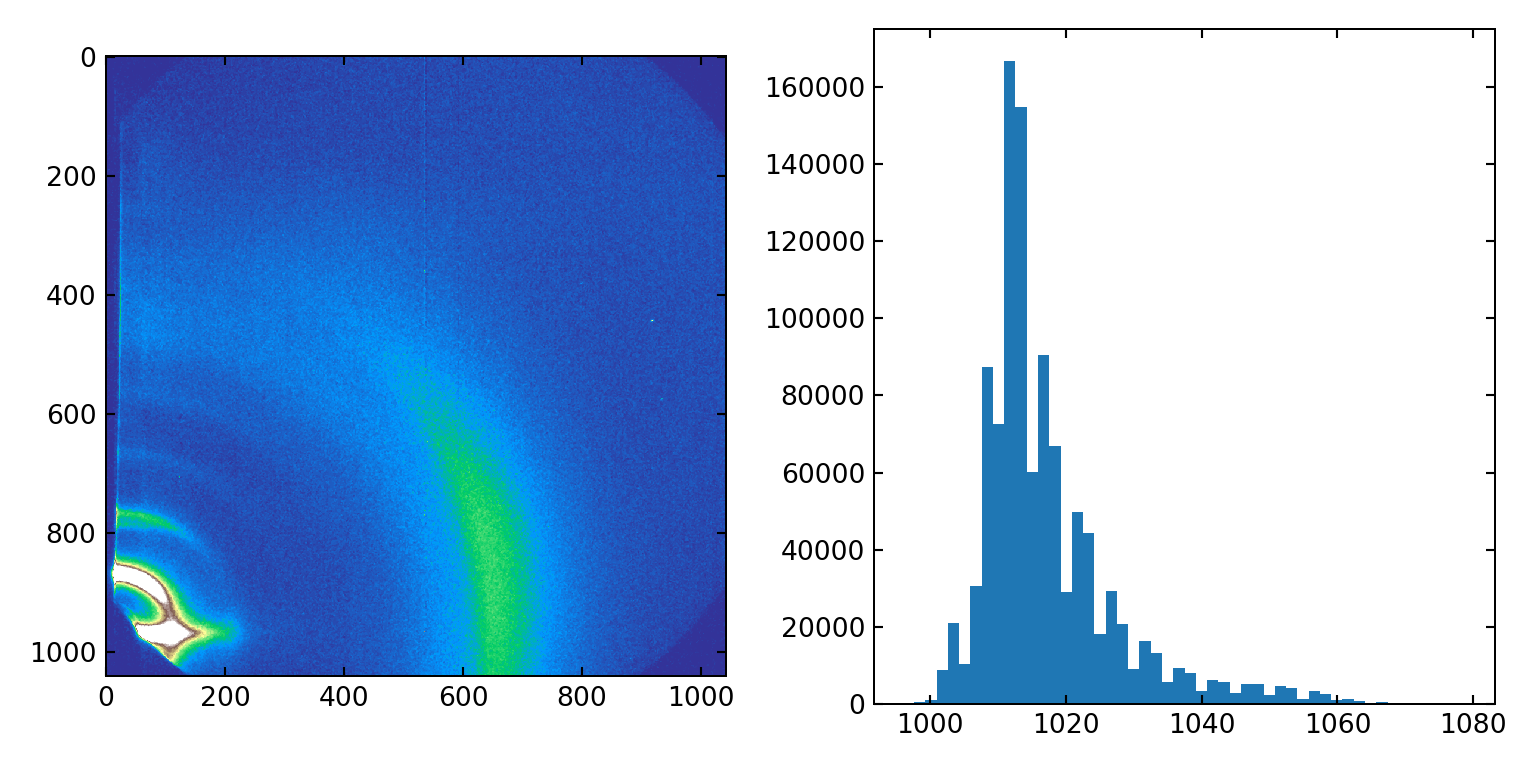

In [15]:
test = get_data(df,2, offset=0)
corr_test = test-np.min(test)+1
log_test = np.log(corr_test)
tlim = np.percentile(log_test, (2, 99.6))

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(log_test, cmap='terrain',
           vmin=tlim[0], vmax=tlim[1])
plt.subplot(1,2,2)
hh=plt.hist(test[(test<1080) & (test>990)].ravel(), bins=50)

### Figure out these rotator angles...

In [16]:
### detector rotations from sample view
rot1 = 0    /180 * np.pi # move detector to right, in-plane angle# in radians
rot2 = 0    /180 * np.pi # move detector down, out-of-plane angle
rot3 = -88.8    /180 * np.pi # clockwise rotation

<IPython.core.display.Javascript object>


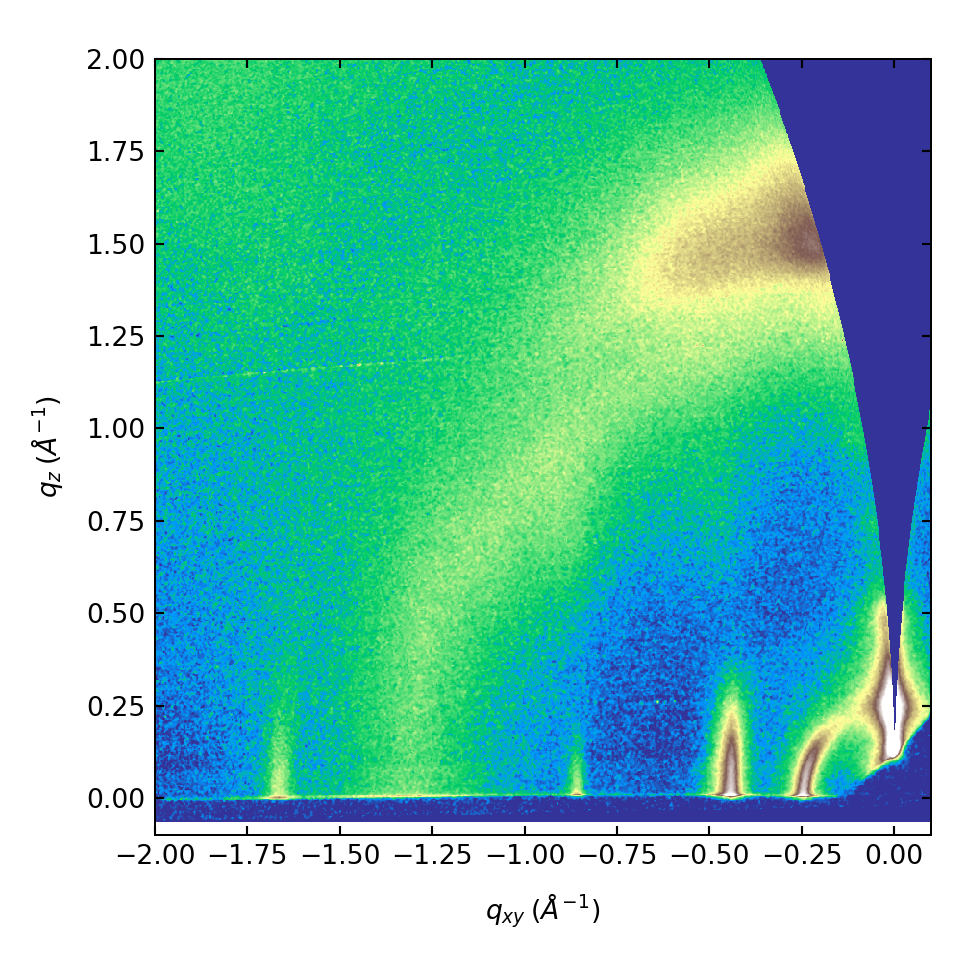

/anaconda/envs/pygix/lib/python3.6/site-packages/pygix-0.1.4a0-py3.6.egg/pygix/plotting.py:346: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif clim == 'auto':


(<matplotlib.image.AxesImage at 0x101e6e550>,
 <matplotlib.axes._subplots.AxesSubplot at 0x101e58390>)

In [17]:
sample = 35

pg = pygix.Transform(dist = sdd, poni1 = poni1, poni2 = poni2,
                     rot1 = rot1, rot2 = rot2, rot3 = rot3,
                     wavelength = wl, sample_orientation = sample_orientation,
                     incident_angle = df['theta'].loc[sample], tilt_angle = tilt_angle,
                     detector=detector)

imgt, qxy, qz = pg.transform_reciprocal(get_data(df,sample), method='lut', correctSolidAngle=True, unit='A')
corrimg = imgt-np.min(imgt)+1
logimg = np.log(corrimg)

clim = np.percentile(logimg[logimg>0], (3, 99.8))
plt.figure(figsize=(5,5))
ppl.implot(logimg, qxy, qz, mode='rsma',
           cmap="terrain", clim=clim,
           xlim=(-2,0.1), ylim=(-0.1,2),
           newfig=False)

## Define a function to make a transform with these parameters

In [18]:
print(det_params)

 final_simplex: (array([[9.71575373e+02, 1.05340862e+01, 2.34227789e-01, 2.05264069e+02,
        1.69105286e+03],
       [9.71575373e+02, 1.05340862e+01, 2.34227789e-01, 2.05264068e+02,
        1.69105286e+03],
       [9.71575373e+02, 1.05340862e+01, 2.34227789e-01, 2.05264067e+02,
        1.69105286e+03],
       [9.71575373e+02, 1.05340862e+01, 2.34227789e-01, 2.05264070e+02,
        1.69105286e+03],
       [9.71575373e+02, 1.05340862e+01, 2.34227789e-01, 2.05264067e+02,
        1.69105286e+03],
       [9.71575373e+02, 1.05340862e+01, 2.34227789e-01, 2.05264070e+02,
        1.69105286e+03]]), array([0.00093025, 0.00094832, 0.00116318, 0.0012435 , 0.00165367,
       0.00175103]))
           fun: 0.0009302478283643723
       message: 'Optimization terminated successfully.'
          nfev: 355
           nit: 179
        status: 0
       success: True
             x: array([9.71575373e+02, 1.05340862e+01, 2.34227789e-01, 2.05264069e+02,
       1.69105286e+03])


In [20]:
def setup_detector(theta):
    
    # NSLS-II is a photon Science CCD
 
    # 1042x1042 with 0.1017 mm pixels
    # 11 keV
    # nominally 228.8 mm
    # has ~ 16 degree horizontal tilt
    # has a ~ 995 count offset

    ### Starting beam position
    sdd = 0.23423
    center = [971.575, 10.534] # -y, +x

    ### Detector pixel size
    det_pix = [101.7e-6, 101.7e-6]
    detector = pyFAI.detectors.Detector(det_pix[0], det_pix[1])

    ### Wavelength
    wl = 1.127e-10

    ### Beamcenter from sample view in meters from lower left of detector
    poni1 = center[0] * det_pix[0]; poni2 = center[1] * det_pix[1]

    ### detector rotations from sample view
    rot1 = 0.0 /180 * np.pi # move detector to right, in-plane angle# in radians
    rot2 = 0.0 /180 * np.pi # move detector down, out-of-plane angle
    rot3 = -88.8 /180 * np.pi # clockwise rotation

    ### Orientations and Angles
    sample_orientation = 1    # 1 is horizontal, 2 is vertical
    tilt_angle = 0            # tilt angle of sample in deg (misalignment in "chi")
    
    ### Initialize the transform
    pg = pygix.Transform(dist = sdd, poni1 = poni1, poni2 = poni2,
                     rot1 = rot1, rot2 = rot2, rot3 = rot3,
                     wavelength = wl, sample_orientation = sample_orientation,
                     incident_angle = theta, tilt_angle = tilt_angle,
                     detector=detector)
    
    return pg